<a href="https://colab.research.google.com/github/ronaldobresende/folhauol-text-mining/blob/main/Question%C3%A1rio_Projeto_de_Disciplina_de_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

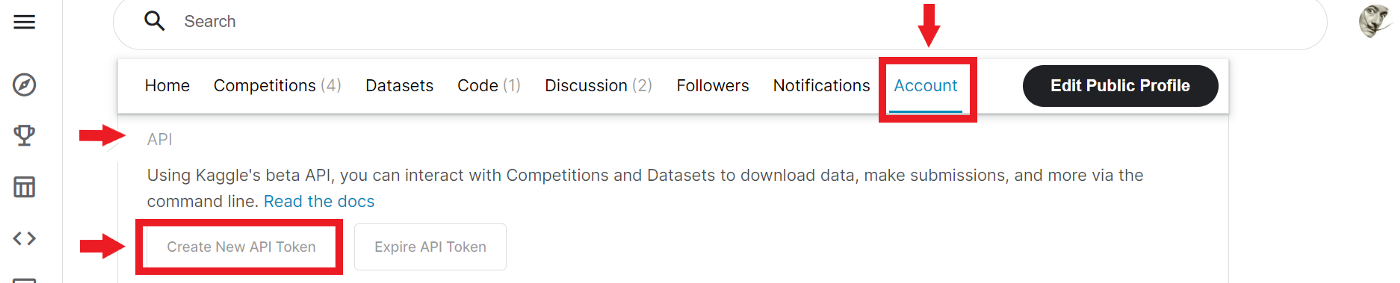

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

In [1]:
!pip install -q kaggle
!rm -rf kaggle.json
from google.colab import files

files.upload()

{}

Crie a pasta .kaggle

In [2]:
!rm -rf .kaggle
!mkdir .kaggle
!cp kaggle.json .kaggle/
!chmod 600 .kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '.kaggle/kaggle.json': No such file or directory


In [3]:
import os
os.environ['KAGGLE_USERNAME'] = 'ronaldobresende'
os.environ['KAGGLE_KEY'] = '003ef036f9085dda266a81916aa3ad8c'

Baixe o dataset

In [4]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 87% 162M/187M [00:00<00:00, 362MB/s]
100% 187M/187M [00:00<00:00, 335MB/s]


## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [5]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("news-of-the-site-folhauol.zip")

# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [6]:
# Escreva seu código aqui
!pip install -U spacy
!python -m spacy download pt_core_news_lg

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload

## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [7]:
import nltk

# Escreva seu código aqui
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')
nltk.download('punkt_tab')

# Exemplo de uso para garantir que estão funcionando
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

texto = "Exemplo de frase para tokenização e remoção de stopwords."
tokens = word_tokenize(texto, language='portuguese')
stop_words = set(stopwords.words('portuguese'))
tokens_filtrados = [w for w in tokens if w.lower() not in stop_words]

print(tokens_filtrados)

['Exemplo', 'frase', 'tokenização', 'remoção', 'stopwords', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Carregar os módulos usados ao longo desse notebook

In [10]:
#!pip install pyldavis==3.2.2 &> /dev/null
!pip install pyldavis &> /dev/null
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

import pyLDAvis
#import pyLDAvis.sklearn

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any


SEED = 123

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [11]:
df['date'] = pd.to_datetime(df.date)
# Create a dataframe named news_2016
news_2016 = df[(df['date'].dt.year == 2016) & (df['category'].str.lower() == 'mercado')].copy()

print(news_2016.shape)
news_2016.head()

(7943, 6)


,title,text,date,category,subcategory,link
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...


## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem).
Para tal, complete o conteúdo da função `tokenize`.

In [12]:
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords

stemmer = RSLPStemmer()

def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`

  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """
  #escreva seu código aqui
  tokens = word_tokenize(text, language='portuguese')
  stems = [stemmer.stem(token.lower()) for token in tokens if token.isalpha()]
  return stems

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [13]:
# Escreva seu código aqui

# Carregar o modelo de linguagem português (grande)
nlp = spacy.load("pt_core_news_lg")

# Aplicar o modelo SpaCy a cada texto
news_2016.loc[:, 'spacy_doc'] = news_2016.text.progress_map(nlp)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [14]:
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    return (
        w.is_alpha and
        w.lemma_.lower() not in complete_stopwords and
        w.lemma_.lower() not in ["o", "em", "em o", "em a", "ano"]
    )


def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """
    # Escreva seu cógigo aqui
    return [w.lemma_.lower() for w in doc if filter(w)]

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [15]:
def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  # Escreva seu código aqui
  return [ent.text for ent in doc.ents if ent.label_ == "ORG"]

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF.
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos.

In [16]:
class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None


  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      # Escreva seu código aqui
      # Transformar listas de tokens em strings (TFIDF exige string de texto)
      docs = [" ".join(tokens) for tokens in self.doc_tokens]

      # Instanciar e ajustar o TfidfVectorizer
      self.tfidf = TfidfVectorizer(
          max_features=5000,
          min_df=10,
          tokenizer=str.split  # já estamos passando strings tokenizadas
      ).fit(docs)

      return self.tfidf

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
    tokens = ' '.join(tokens)
    array =  vectorizer().transform([tokens]).toarray()[0]
    return array


news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [17]:

N_TOKENS = 9

corpus = np.array(news_2016.tfidf.tolist())
#Escreva seu código aqui
# Criar e ajustar o modelo LDA
lda = LDA(
    n_components=N_TOKENS,
    max_iter=100,
    random_state=SEED,
    learning_method='batch'  # padrão para boa estabilidade
)

lda.fit(corpus)

LatentDirichletAllocation(max_iter=100, n_components=9, random_state=123)

### Visualize os tópicos usando a ferramenta pyLDAVis

In [18]:

from pyLDAvis import prepare
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Preparar visualização
pyLDAvis.enable_notebook()

# Criar um CountVectorizer para gerar o vocabulário e frequências
count_vectorizer = CountVectorizer(
    max_features=5000,
    min_df=10,
    tokenizer=str.split
)
count_corpus = count_vectorizer.fit_transform([" ".join(tokens) for tokens in news_2016.spacy_lemma])

# Obter vocabulário e frequências
vocab = count_vectorizer.get_feature_names_out()
term_frequency = count_corpus.sum(axis=0).A1  # Frequência total de cada termo
# Calcular o comprimento dos documentos
doc_lengths = count_corpus.sum(axis=1).A1

# Obter distribuições de tópicos por documento e de termos por tópico
doc_topic_dists = lda.transform(count_corpus)
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]


# Preparar o painel de visualização
panel = pyLDAvis.prepare(
    topic_term_dists=topic_term_dists,
    doc_topic_dists=doc_topic_dists,
    doc_lengths=doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency
)

# Exibir
panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.103842  0.009849       1        1  72.292178
2      0.289090  0.015298       2        1  25.354349
0     -0.131838  0.165605       3        1   0.986527
4     -0.096957 -0.141943       4        1   0.463222
1     -0.016650  0.034029       5        1   0.457388
8     -0.042377 -0.037148       6        1   0.238947
6     -0.037735 -0.017314       7        1   0.088392
7     -0.035978 -0.016075       8        1   0.073319
5     -0.031397 -0.012302       9        1   0.045679, topic_info=              Term         Freq         Total Category  logprob  loglift
3311             o  67096.00000  67096.000000  Default  30.0000  30.0000
1300            de  53847.00000  53847.000000  Default  29.0000  29.0000
4987        índice   3374.00000   3374.000000  Default  28.0000  28.0000
943      companhia   3377.00000   3377.000000  Default  27.0000  27.0000
3986       receita   2666.00000   2666.000000  Default  26.0000  26.0000
...            ...          ...           ...      ...      ...      ...
2536  independente      0.17553    312.216798   Topic9  -8.5172   0.2077
2162        formar      0.17553    491.265392   Topic9  -8.5172  -0.2456
4921           voo      0.17553    689.652329   Topic9  -8.5172  -0.5848
3686       possuir      0.17553    566.389638   Topic9  -8.5172  -0.3879
1093  constituição      0.17553    473.546865   Topic9  -8.5172  -0.2089

[516 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1         1  0.732214       a
1         2  0.265495       a
1         3  0.000191       a
1         4  0.000096       a
1         5  0.001913       a
...     ...       ...     ...
4987      2  0.835495  índice
4987      3  0.000593  índice
4987      4  0.000296  índice
4987      5  0.000296  índice
4987      6  0.050088  índice

[2457 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 5, 2, 9, 7, 8, 6])

### Atribua a cada text, um (e apenas um) tópic.

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [19]:
def get_topic(tfidf: np.array):
    """
    Get topic for a lda trained model
    """
    # Escreva seu código aqui
    topic_distribution = lda.transform([tfidf])[0]
    return int(np.argmax(topic_distribution))

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Número de documentos vs tópicos

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

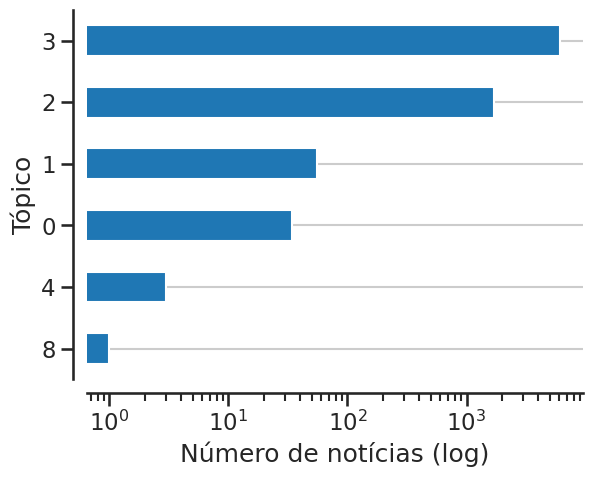

In [20]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

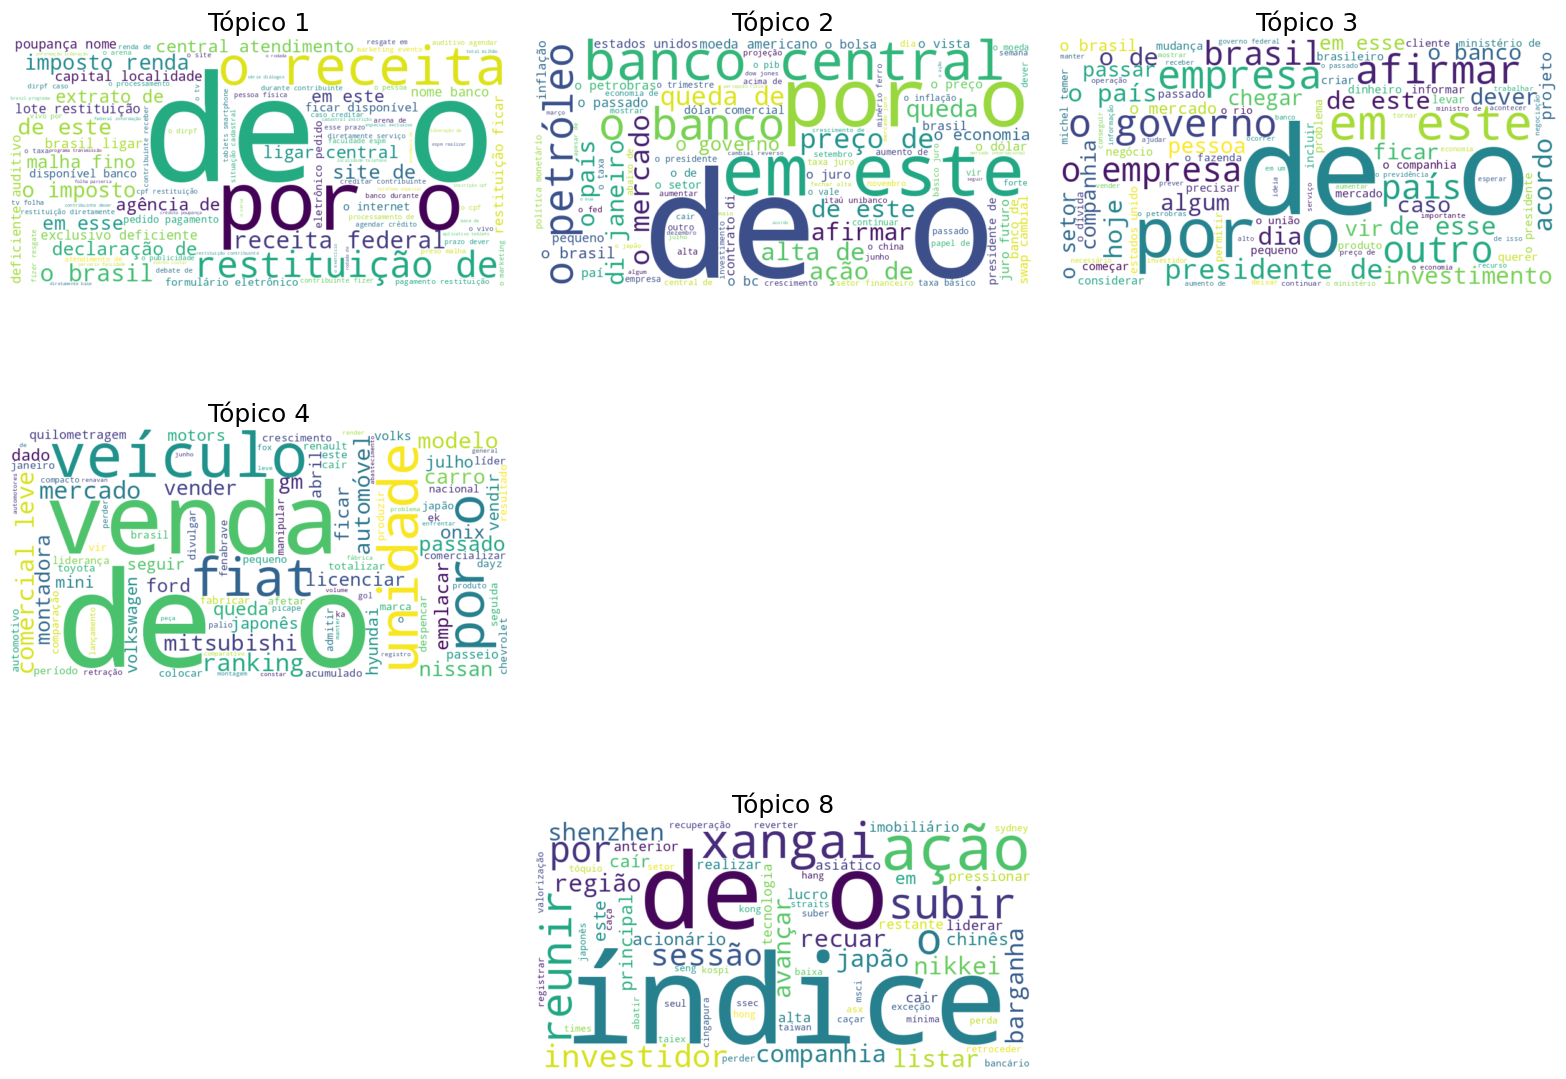

In [21]:
def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    # Escreva seu código aqui
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    return ax

def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

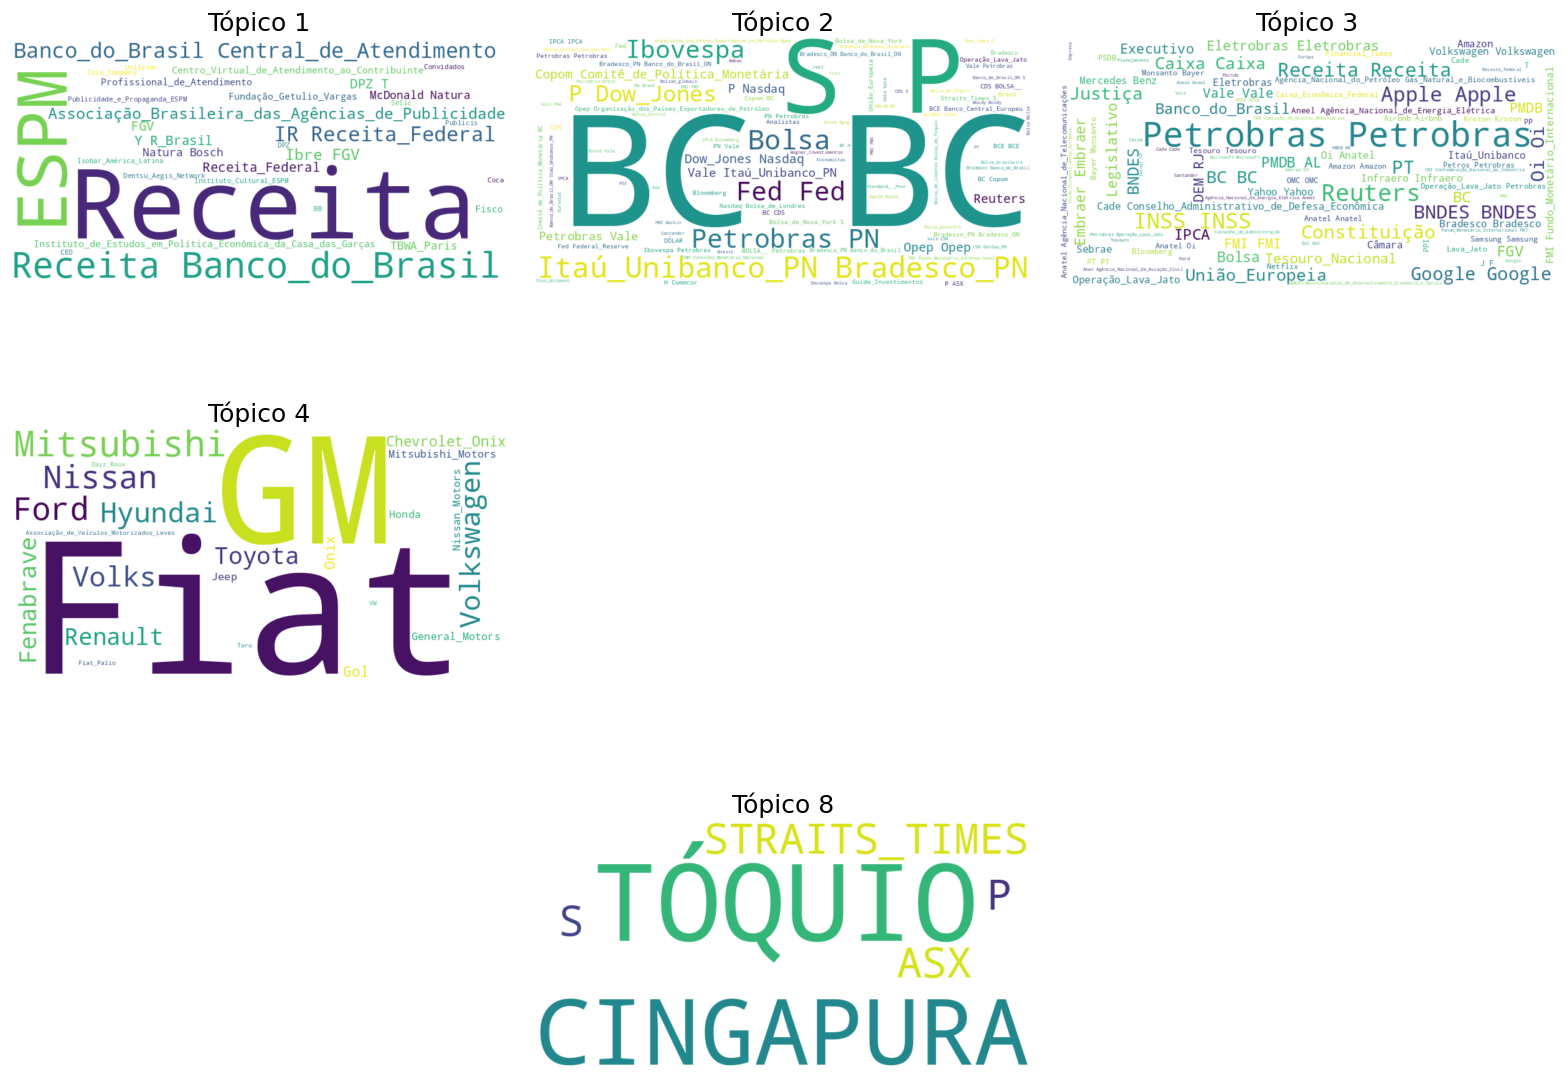

In [22]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

In [34]:
from google.colab import drive
drive.mount('/content/drive')

import nbformat


import os

drive_path = "/content/drive/MyDrive"

for filename in os.listdir(drive_path):
    print(filename)



notebook_path = "/content/drive/MyDrive/Colab Notebooks/Text_Mining.ipynb"



with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Corrigir metadata.widgets
if "widgets" in nb["metadata"]:
    if "state" not in nb["metadata"]["widgets"]:
        nb["metadata"]["widgets"]["state"] = {}

with open(notebook_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Presença.gsheet
Lista de tarefas.gsheet
Monitor de investimentos do Google Finance.gsheet
Colab Notebooks
Cópia de Text_Mining.ipynb
